In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda"
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])

# Preview data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


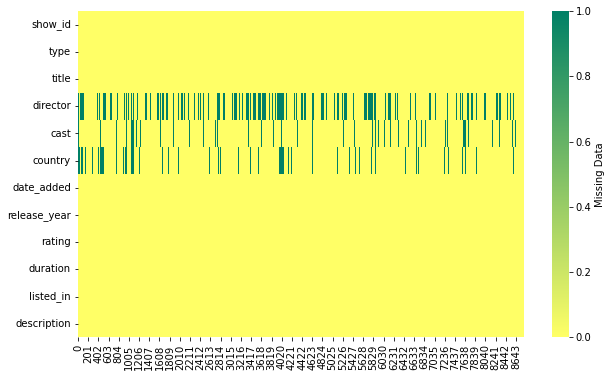

In [6]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isna().transpose(),
           cmap = "summer_r",
           cbar_kws = {'label':"Missing Data"})
plt.show()

In [7]:
df_movies = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']

# Exploratory Data Analysis

## Univariant Analysis

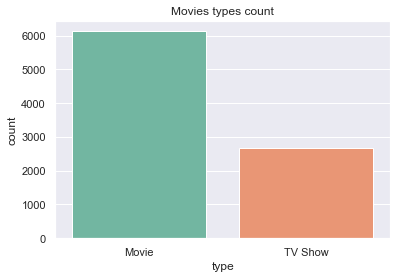

In [8]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x="type", data=df, palette="Set2")
plt.title("Movies types count")
plt.show()

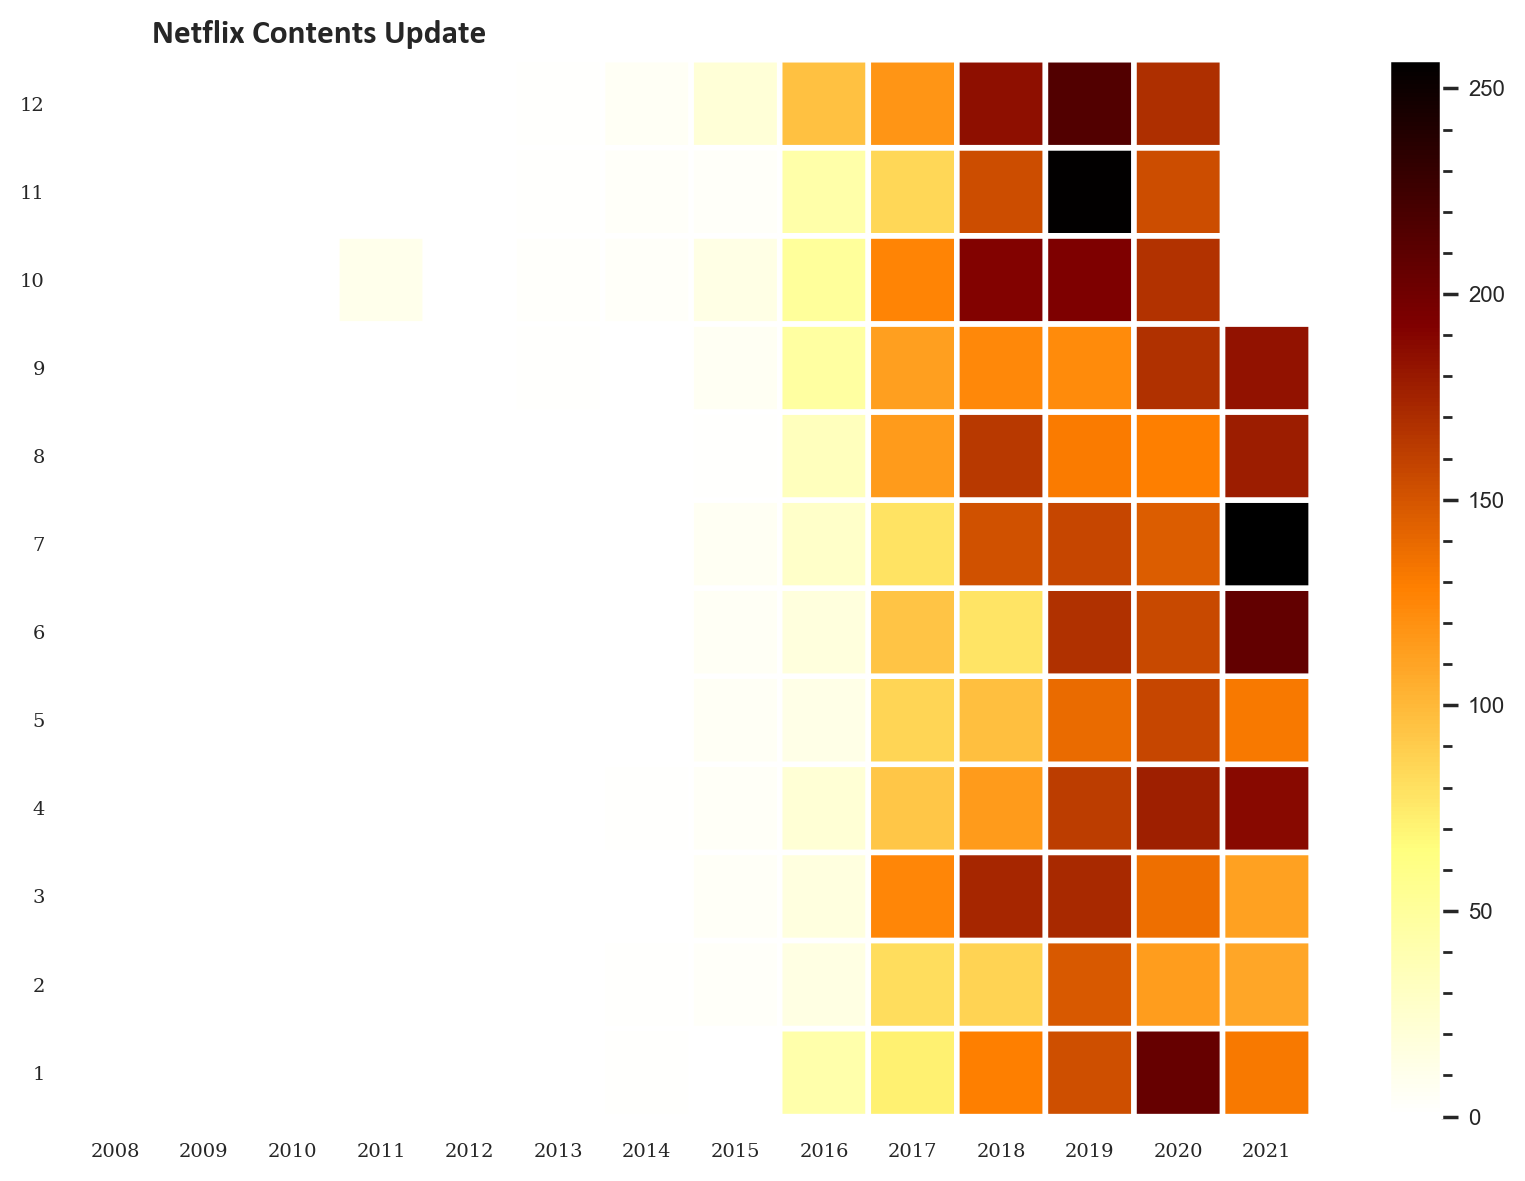

In [9]:
netflix_date = df[['date_added']].dropna()

#netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
#netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.month

#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
dt = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(dt, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(dt.columns), 1), dt.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(dt.index), 1), dt.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [10]:
from collections import Counter

genres = list(df['listed_in'])
gen=[]

for i in genres:
    genre = list(i.split(','))
    for j in genre:
        d = j.replace('-','')
        d = d.replace(' ','')
        gen.append(d)

g = Counter(gen)

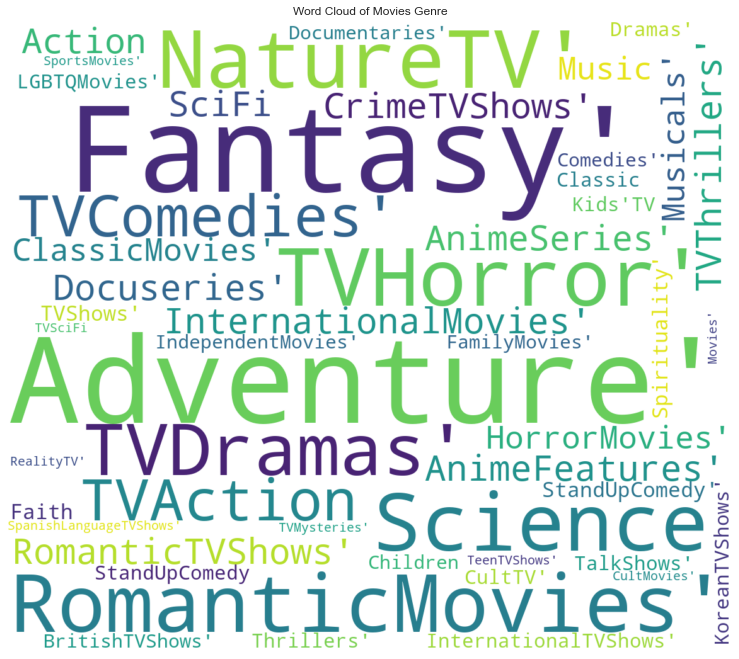

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('star.png')) #failed shape
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.title("Word Cloud of Movies Genre")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\FPT\AppData\Local\Temp\ipykernel_10264\1575019492.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


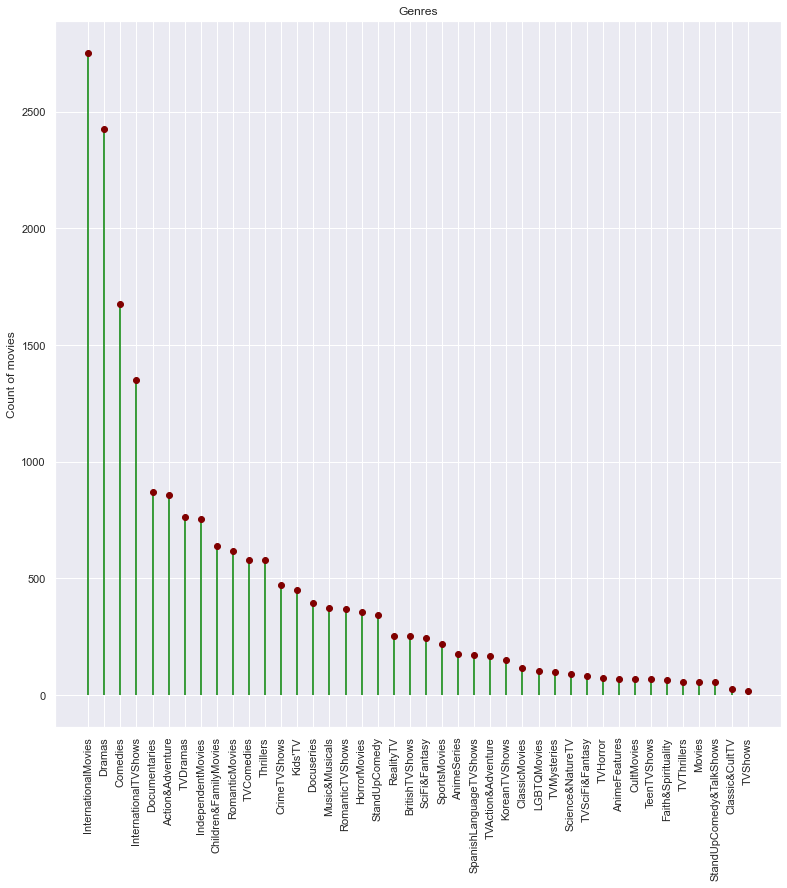

<Figure size 720x720 with 0 Axes>

In [12]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

In [13]:
#Fetching country list
countries1={}
df['country'].fillna('Unknown', inplace = True)
cou1 = list(df['country'])
for i in cou1:
    list_country = list(i.split(','))
    if len(list_country)==1:
        if list_country in list(countries1.keys()):
            countries1[list_country[0]] += 1
        else:
            countries1[list_country[0]]=1
    else:
        for j in list_country:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [14]:
countries_fin1={}
for country, no in countries1.items():
    country = country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country] += no
    else:
        countries_fin1[country] = no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

In [15]:
#create dataframe from dictionary
countries_dict = {
    'name' : list(countries_fin1.keys()),
    'cnt' : list(countries_fin1.values())
}
countries_df = pd.DataFrame(countries_dict).head(10)

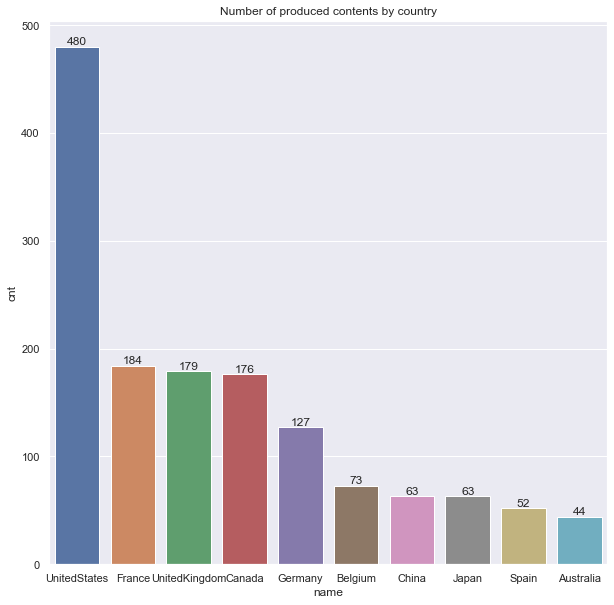

In [16]:
plt.figure(figsize = (10,10))
#sns.barplot(x = list(countries_fin1.values()), y = list(countries_fin1.keys()), orient = 'h')
ax = sns.barplot(x = 'name', y = 'cnt', data = countries_df) #orient = 'h'
ax.bar_label(ax.containers[0])
plt.title('Number of produced contents by country')
plt.show()

### Movies analysis

In [17]:
features = ['title','duration']
durations = df_movies.loc[:,features]

durations['length'] = durations['duration'].str.replace(' min','')
durations.drop('duration', axis = 1, inplace = True)
durations['length'].fillna(0, inplace = True)
durations['length'] = durations['length'].astype(int)

<AxesSubplot:xlabel='length', ylabel='Density'>

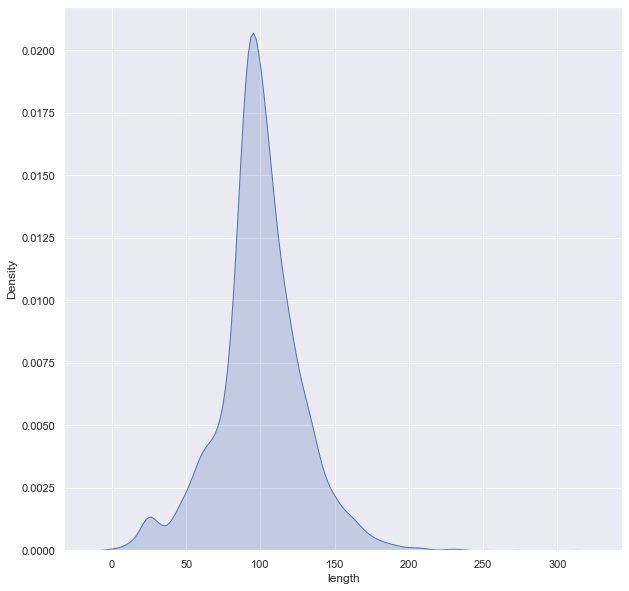

In [18]:
plt.figure(figsize = (10,10))
sns.set(style = 'darkgrid')
sns.kdeplot(data = durations['length'], shade = True)
#plt.xticks(

### Series Analysis

In [19]:
features = ['title','duration']
durations = df_shows.loc[:,features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)

durations.drop('duration', axis = 1, inplace = True)

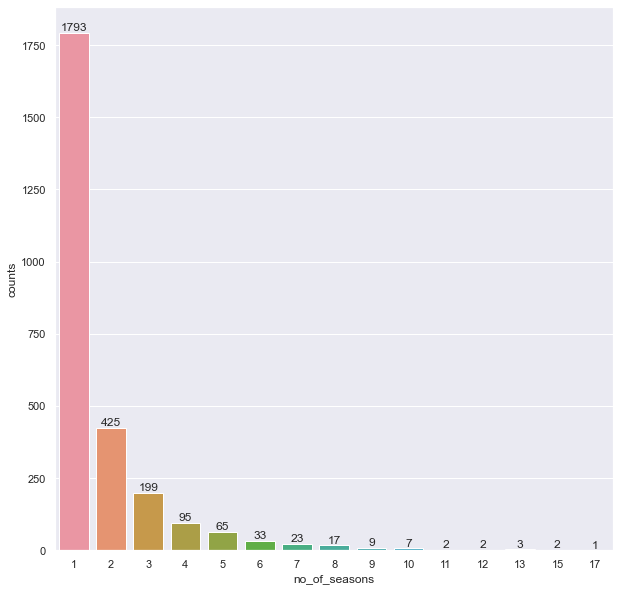

In [20]:
ss_count = pd.DataFrame(durations['no_of_seasons'].value_counts()).reset_index()
ss_count.rename(columns = {'no_of_seasons':'counts','index' : 'no_of_seasons'}, inplace = True)
plt.figure(figsize = (10,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = 'no_of_seasons', y = 'counts', data = ss_count)
ax.bar_label(ax.containers[0]) #value labels on bar chart
plt.show()

### Release Year

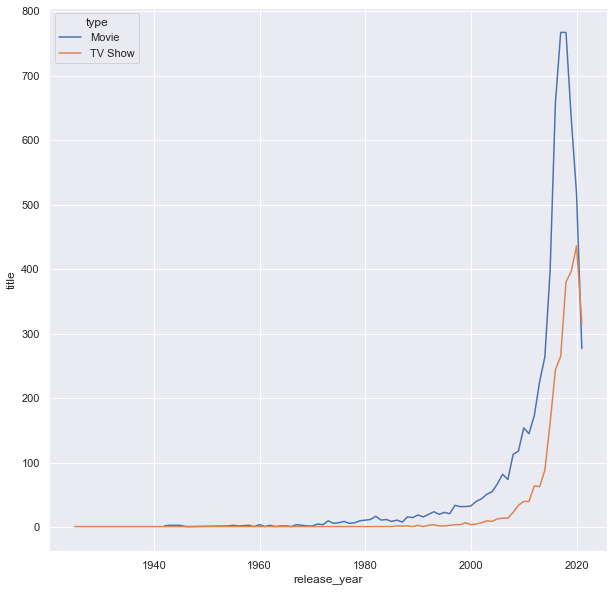

In [21]:
rl_year = df[['type','title','release_year']]
ry_data = rl_year.groupby(['type','release_year']).count()
ry_data.reset_index(inplace = True)
plt.figure(figsize = (10,10))
sns.set(style = 'darkgrid')
sns.lineplot(x = 'release_year', y = 'title', hue = 'type', data = ry_data)
plt.show()

# Recommendation System 

## Based on similarities between 2 movies

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

18895 words in all of 8807 shows description

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.



In [30]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [31]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [32]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [33]:
get_recommendations("Grey's Anatomy")

686     Hospital Playlist
2406           Lenox Hill
6006              28 Days
836             Ghost Lab
5797             Extremis
334       Five Feet Apart
3729             Rakkhosh
6337                 Blow
6602               Devrai
4043          Secret City
Name: title, dtype: object

### Most appeared words in description

In [59]:
descriptions = list(df['description'])
word_list = []
for description in descriptions:
    t = description.lower().replace('.','')
    t = t.replace(',','')
    t = t.replace('-',' ')
    words = t.split(' ')
    for word in words:
        word_list.append(word)
word_count = Counter(word_list)

In [60]:
true_word_count = {}
for word in word_count.keys():
    if word not in STOPWORDS:
        true_word_count[word] = word_count[word]

In [61]:
{k: v for k, v in sorted(true_word_count.items(), key=lambda item: item[1], reverse = True)}

{'life': 826,
 'young': 729,
 'new': 708,
 '–': 605,
 'family': 569,
 'world': 511,
 'man': 508,
 'two': 505,
 'love': 500,
 'woman': 455,
 'friends': 433,
 'must': 398,
 'series': 394,
 'one': 381,
 'documentary': 364,
 'find': 340,
 'school': 325,
 'finds': 313,
 'home': 312,
 'old': 308,
 'three': 301,
 'high': 298,
 'help': 292,
 '—': 279,
 'lives': 276,
 'takes': 275,
 'group': 262,
 'years': 251,
 'father': 248,
 'take': 240,
 'back': 233,
 'girl': 225,
 'save': 222,
 'year': 222,
 'city': 210,
 'town': 208,
 'teen': 208,
 'four': 207,
 'true': 207,
 'daughter': 205,
 'war': 204,
 'special': 203,
 'team': 202,
 'becomes': 202,
 'time': 199,
 'murder': 194,
 'death': 189,
 'son': 189,
 'past': 187,
 'best': 183,
 'mysterious': 183,
 'crime': 182,
 'comedy': 182,
 'show': 177,
 'story': 176,
 'gets': 176,
 'secret': 174,
 'mother': 172,
 'wife': 169,
 'behind': 167,
 'way': 166,
 'soon': 166,
 'stand': 166,
 'make': 163,
 'women': 162,
 'based': 162,
 'boy': 161,
 'tries': 160,
 'b

In [63]:
text = list(set(true_word_count.keys()))
print(text)
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=10,background_color="white").generate(str(text))

plt.title("Word Cloud of Movies Genre")
#plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

['', 'anda', 'times', 'entertains', 'puns', 'resources', 'scandals', 'declaring', 'handman', 'martínez)', '11', 'biases', "white's", 'zenos', 'edible', 'archaeologist"', 'taco', 'april', 'webcam', 'zoé', 'backgrounds:', 'mccordle', 'sofía', 'sideways', 'soothe', 'overtaking', 'pianist’s', 'homophobia', 'gravely', '1985', 'robots:', 'baki', 'duels', 'marvel', 'agendas', 'jimo', 'fete', 'intimate', 'avoids', 'grillo', 'cyborg', "stine's", 'contains', 'perceive', 'vulnerable', 'radiohead', 'ranging', 'dweebs', 'kublai', 'celis', 'burns', 'features', 'gio', 'packham', 'singapore', 'senile', 'organized', 'instead', 'lohane', 'floor!', 'rumble', 'mere', 'careers', '(unintentionally)', 'delusional', 'adopting', 'blessed', 'champions', 'bombshell', 'priya', 'avatar', 'okon', "morsi's", 'foreigners', 'omi', 'seedy', 'quest', 'quasar', 'proposes', 'talented', 'released', 'busted', 'insurgency', 'bearing', 'takizawa', 'himalayas', 'overcrowded', 'preparing', 'hairline', 'adjusted', 'lord', 'reawa